In today's interconnected world, the relationship between government effectiveness and the preservation of human freedoms has become a topic of increasing significance. Governments play a pivotal role in shaping the socio-political landscape of their respective nations, influencing everything from economic policies to social rights and individual liberties. As societies evolve, understanding the intricate dynamics between governmental efficacy and the maintenance of human freedoms becomes paramount.

Through our project, we plan to delve into this complex relationship by employing statistical analysis and machine learning techniques to forecast how the effectiveness of a government might impact future levels of human freedom within a given country. By exploring this nexus, we seek not only to enhance our understanding of governance dynamics but also to offer insights that can inform policy-making and foster the advancement of individual liberties worldwide.



To help us with our goal, we browsed through the Kaggle website to select a suitable dataset. We then settled on the “Human Freedom Index (updated as of 2022)” which uses several distinct indicators of personal and economic freedom in the following areas: Rule of Law, Security and Safety, Movement, Religion, Association/ Assembly/ Civil Society, Expression & Information, Relationships, Size of Government, Legal System and Property Rights, Sound Money, Freedom to Trade Internationally, Regulation.

Before we can load our dataset, let's begin by importing some essential libraries which will aid us in our project.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)

Next, we shall load our dataset, and rename it to freedom_data for convenience.

In [2]:
freedom_data=pd.read_csv('freedomindex2022.csv', header = 0)

Let's take a quick look at our dataset.

In [3]:
freedom_data.head()

,year,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol_vdem,pf_rol,pf_ss_homicide,pf_ss_homicide_data,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_violent_data,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_fatalities_data,pf_ss_disappearances_injuries,pf_ss_disappearances_injuries_data,pf_ss_disappearances_torture,pf_ss_killings,pf_ss_disappearances,pf_ss,pf_movement_vdem_foreign,pf_movement_vdem_men,pf_movement_vdem_women,pf_movement_vdem,pf_movement_cld,pf_movement,pf_religion_freedom_vdem,pf_religion_freedom_cld,pf_religion_freedom,pf_religion_suppression,pf_religion,pf_assembly_entry,pf_assembly_freedom_house,pf_assembly_freedom_bti,pf_assembly_freedom_cld,pf_assembly_freedom,pf_assembly_parties_barriers,pf_assembly_parties_bans,pf_assembly_parties_auton,pf_assembly_parties,pf_assembly_civil,pf_assembly,pf_expression_direct_killed,pf_expression_direct_killed_data,pf_expression_direct_jailed,pf_expression_direct_jailed_data,pf_expression_direct,pf_expression_vdem_cultural,pf_expression_vdem_harass,pf_expression_vdem_gov,pf_expression_vdem_internet,pf_expression_vdem_selfcens,pf_expression_vdem,pf_expression_house,pf_expression_bti,pf_expression_cld,pf_expression,pf_identity_same_m,pf_identity_same_f,pf_identity_same,pf_identity_divorce,pf_identity_inheritance_widows,pf_identity_inheritance_daughters,pf_identity_inheritance,pf_identity_fgm,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_consumption_data,ef_government_transfers,ef_government_transfers_data,ef_government_investment,ef_government_investment_data,ef_government_tax_income,ef_government_tax_income_data,ef_government_tax_payroll,ef_government_tax_payroll_data,ef_government_tax,ef_government_soa,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_regulatory,ef_legal_police,ef_gender,ef_legal,ef_money_growth,ef_money_growth_data,ef_money_sd,ef_money_sd_data,ef_money_inflation,ef_money_inflation_data,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_revenue_data,ef_trade_tariffs_mean,ef_trade_tariffs_mean_data,ef_trade_tariffs_sd,ef_trade_tariffs_sd_data,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_open,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_burden,ef_regulation_business_start,ef_regulation_business_impartial,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2020,Albania,Eastern Europe,7.67,47.0,2.0,5.903741,4.725831,4.047825,7.194198,4.771938,9.343023,2.260000,10.0,10.000000,0.0,7.5,10.000000,0.0,10.000000,0.0,6.8475,9.7475,9.156429,9.249726,9.5725,9.8625,9.8775,9.770833,3.333333,6.552083,9.3400,10.000000,9.670000,9.8450,9.757500,8.3500,7.5,10.000000,10.000000,9.166667,9.5400,9.4600,7.7200,8.906667,8.2225,8.661458,10.0,0,10.000000,0,10.00000,6.6900,4.6075,3.2775,7.383333,5.713333,5.534333,5.0,6.666667,3.333333,6.106867,10.0,10.0,10.0,7.5,NaN,NaN,7.5,10.0,8.75,7.69,58.0,8.026471,12.71,6.978202,11.590000,7.545714,23.59,9.0,23,7.0,34,8.0,8.5350,7.817077,4.194511,4.073332,3.841150,8.333333,5.403750,3.913506,6.715384,5.607842,1.000000,5.260351,9.783394,1.083032,9.693881,0.765299,9.6758,1.621,10.0,9.788269,9.573333,0.64,9.28,3.6,8.0848,4.788,8.979378,6.807307,9.405328,8.106317,10.000000,4.168718,4.615385,8.6288,5.804301,8.222499,10.0,3.768482,10.0,7.922827,5.566667,4.865385,5.575783,8.0,6.29974

In [4]:
print("Number of rows:", freedom_data.shape[0])
print("Number of columns:", freedom_data.shape[1])

Number of rows: 3465
Number of columns: 141


Our dataset contains a number of variables which contribute to the human freedom score of a given country. Using the dataset, we are also able to observe trends as the data provided spans from 2000 to 2020.

Let's take a look at the variables in our dataset.

In [5]:
for column in freedom_data.columns:
    print(column)

year
countries
region
hf_score
hf_rank
hf_quartile
pf_rol_procedural
pf_rol_civil
pf_rol_criminal
pf_rol_vdem
pf_rol
pf_ss_homicide
pf_ss_homicide_data
pf_ss_disappearances_disap
pf_ss_disappearances_violent
pf_ss_disappearances_violent_data
pf_ss_disappearances_organized
pf_ss_disappearances_fatalities
pf_ss_disappearances_fatalities_data
pf_ss_disappearances_injuries
pf_ss_disappearances_injuries_data
pf_ss_disappearances_torture
pf_ss_killings
pf_ss_disappearances
pf_ss
pf_movement_vdem_foreign
pf_movement_vdem_men
pf_movement_vdem_women
pf_movement_vdem
pf_movement_cld
pf_movement
pf_religion_freedom_vdem
pf_religion_freedom_cld
pf_religion_freedom
pf_religion_suppression
pf_religion
pf_assembly_entry
pf_assembly_freedom_house
pf_assembly_freedom_bti
pf_assembly_freedom_cld
pf_assembly_freedom
pf_assembly_parties_barriers
pf_assembly_parties_bans
pf_assembly_parties_auton
pf_assembly_parties
pf_assembly_civil
pf_assembly
pf_expression_direct_killed
pf_expression_direct_killed_data


It can be argued that an individual's freedom is greatly affected by their country's government. Therfore, wWe posit that the degree of influence exerted by governments over their populace profoundly shapes the metric assessing human freedo. This then leads us to our problem statement:

How might the effectiveness of a government impact future levels of human freedom and what can be done to improve future levels of human freedom?.

Before we begin analysing and expanding upon our dataset, we need to ensure that our data is clean. We start by taking note of the null values present in each column/ variable.

In [6]:
null_counts = freedom_data.isnull().sum()
pd.set_option('display.max_columns', None)

In [7]:
print("Number of null values for each column:")
for column, count in null_counts.items():
    print(f"Column '{column}': {count}")

Number of null values for each column:
Column 'year': 0
Column 'countries': 0
Column 'region': 0
Column 'hf_score': 382
Column 'hf_rank': 382
Column 'hf_quartile': 382
Column 'pf_rol_procedural': 2075
Column 'pf_rol_civil': 2075
Column 'pf_rol_criminal': 2075
Column 'pf_rol_vdem': 63
Column 'pf_rol': 48
Column 'pf_ss_homicide': 48
Column 'pf_ss_homicide_data': 48
Column 'pf_ss_disappearances_disap': 50
Column 'pf_ss_disappearances_violent': 0
Column 'pf_ss_disappearances_violent_data': 0
Column 'pf_ss_disappearances_organized': 1494
Column 'pf_ss_disappearances_fatalities': 0
Column 'pf_ss_disappearances_fatalities_data': 0
Column 'pf_ss_disappearances_injuries': 0
Column 'pf_ss_disappearances_injuries_data': 0
Column 'pf_ss_disappearances_torture': 63
Column 'pf_ss_killings': 63
Column 'pf_ss_disappearances': 0
Column 'pf_ss': 0
Column 'pf_movement_vdem_foreign': 63
Column 'pf_movement_vdem_men': 63
Column 'pf_movement_vdem_women': 63
Column 'pf_movement_vdem': 63
Column 'pf_movement_

As our data only contains 3465 rows of information, it would be wise to drop a few variables with high null counts. Here, we decide to drop variables with over 40% null value. Variables with a significant number of missing values may introduce bias or reduce the effectiveness of our analysis.

In [8]:
null_percentage_before = freedom_data.isnull().mean() * 100
columns_to_drop = null_percentage_before[null_percentage_before > 40].index
freedom_dropped = freedom_data.drop(columns=columns_to_drop)
null_percentage_after = freedom_dropped.isnull().mean() * 100

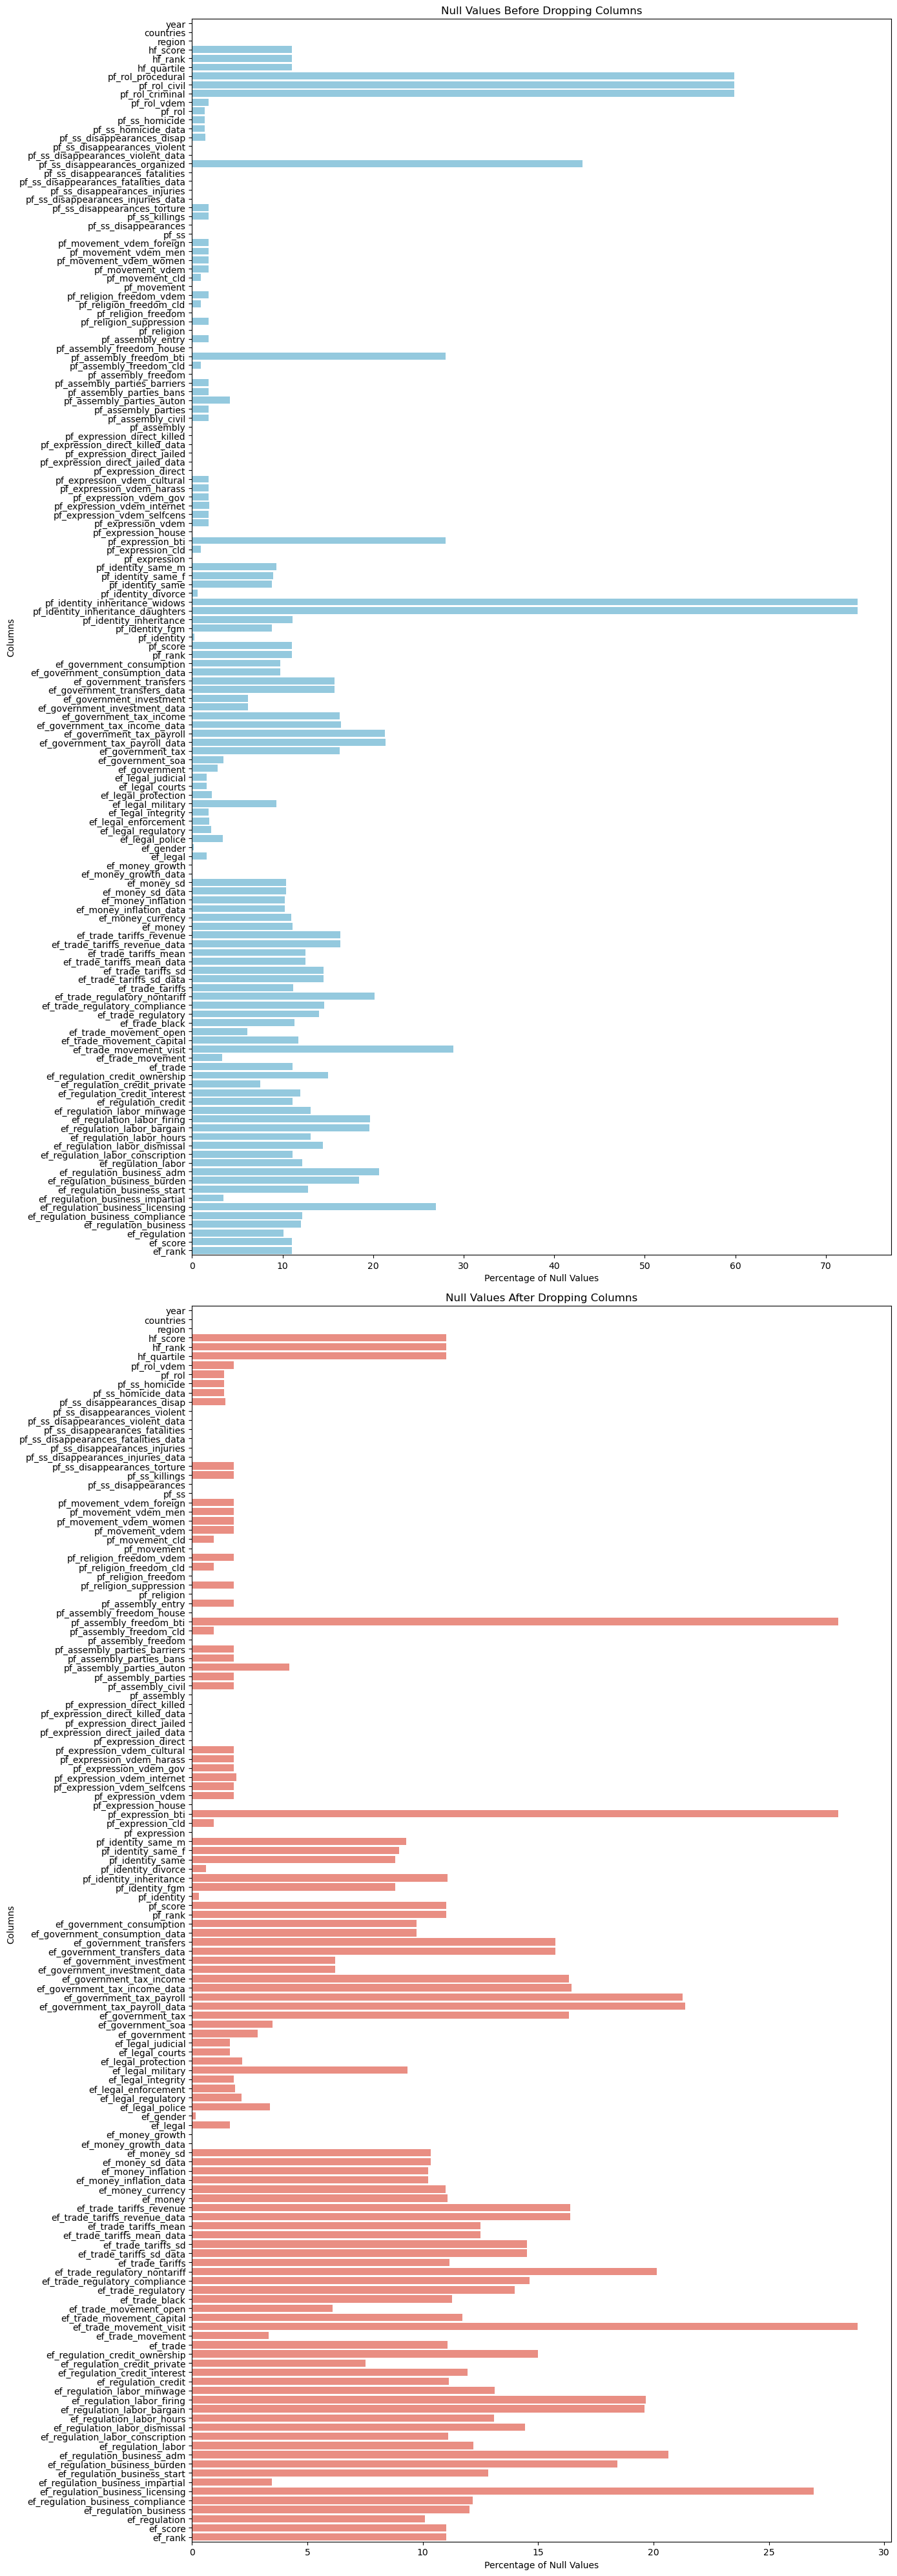

In [9]:
plt.figure(figsize=(14, 40))
plt.subplot(2, 1, 1)
sns.barplot(x=null_percentage_before.values, y=null_percentage_before.index, color='skyblue')
plt.title('Null Values Before Dropping Columns')
plt.ylabel('Columns')
plt.xlabel('Percentage of Null Values')
plt.subplot(2, 1, 2)
sns.barplot(x=null_percentage_after.values, y=null_percentage_after.index, color='salmon')
plt.title('Null Values After Dropping Columns')
plt.ylabel('Columns')
plt.xlabel('Percentage of Null Values')
plt.tight_layout()
plt.show()

In [10]:
null_counts = freedom_dropped.isnull().sum()
pd.set_option('display.max_columns', None)

In [11]:
print("Number of null values for each column:")
for column, count in null_counts.items():
    print(f"Column '{column}': {count}")

Number of null values for each column:
Column 'year': 0
Column 'countries': 0
Column 'region': 0
Column 'hf_score': 382
Column 'hf_rank': 382
Column 'hf_quartile': 382
Column 'pf_rol_vdem': 63
Column 'pf_rol': 48
Column 'pf_ss_homicide': 48
Column 'pf_ss_homicide_data': 48
Column 'pf_ss_disappearances_disap': 50
Column 'pf_ss_disappearances_violent': 0
Column 'pf_ss_disappearances_violent_data': 0
Column 'pf_ss_disappearances_fatalities': 0
Column 'pf_ss_disappearances_fatalities_data': 0
Column 'pf_ss_disappearances_injuries': 0
Column 'pf_ss_disappearances_injuries_data': 0
Column 'pf_ss_disappearances_torture': 63
Column 'pf_ss_killings': 63
Column 'pf_ss_disappearances': 0
Column 'pf_ss': 0
Column 'pf_movement_vdem_foreign': 63
Column 'pf_movement_vdem_men': 63
Column 'pf_movement_vdem_women': 63
Column 'pf_movement_vdem': 63
Column 'pf_movement_cld': 33
Column 'pf_movement': 0
Column 'pf_religion_freedom_vdem': 63
Column 'pf_religion_freedom_cld': 33
Column 'pf_religion_freedom': 

Evidently, our data is still nowhere near clean enough. To amend these null values, we have decided to group the data by Country and replacing the missing values with the Country mean for the particular variable.

In [12]:
numeric_columns = freedom_dropped.select_dtypes(include=['int64', 'float64'])
group_by_countries = freedom_dropped.groupby('countries')

In [13]:
for column in numeric_columns:
    mean_by_country = group_by_countries[column].transform('mean')
    freedom_dropped[column].fillna(mean_by_country, inplace=True)

In [14]:
freedom_dropped.isnull().sum()

year                                      0
countries                                 0
region                                    0
hf_score                                  0
hf_rank                                   0
hf_quartile                               0
pf_rol_vdem                              63
pf_rol                                   21
pf_ss_homicide                            0
pf_ss_homicide_data                       0
pf_ss_disappearances_disap               21
pf_ss_disappearances_violent              0
pf_ss_disappearances_violent_data         0
pf_ss_disappearances_fatalities           0
pf_ss_disappearances_fatalities_data      0
pf_ss_disappearances_injuries             0
pf_ss_disappearances_injuries_data        0
pf_ss_disappearances_torture             63
pf_ss_killings                           63
pf_ss_disappearances                      0
pf_ss                                     0
pf_movement_vdem_foreign                 63
pf_movement_vdem_men            

Next, let's group them by region and replace the missing value with the region mean.

In [15]:
group_by_region = freedom_dropped.groupby('region')
numeric_columns = freedom_dropped.select_dtypes(include=[np.int64, np.float64])

In [16]:
for column in numeric_columns:
    mean_by_region = group_by_region[column].transform('mean')
    freedom_dropped[column].fillna(mean_by_region, inplace=True)

In [17]:
freedom_dropped.isnull().sum()

year                                      0
countries                                 0
region                                    0
hf_score                                  0
hf_rank                                   0
hf_quartile                               0
pf_rol_vdem                               0
pf_rol                                    0
pf_ss_homicide                            0
pf_ss_homicide_data                       0
pf_ss_disappearances_disap                0
pf_ss_disappearances_violent              0
pf_ss_disappearances_violent_data         0
pf_ss_disappearances_fatalities           0
pf_ss_disappearances_fatalities_data      0
pf_ss_disappearances_injuries             0
pf_ss_disappearances_injuries_data        0
pf_ss_disappearances_torture              0
pf_ss_killings                            0
pf_ss_disappearances                      0
pf_ss                                     0
pf_movement_vdem_foreign                  0
pf_movement_vdem_men            

Lastly, we shall drop the variables with leftover null values.

pf_assembly_freedom_bti: This variable  represents the freedom of assembly based on the Bertelsmann Transformation Index (BTI).
pf_expression_bti: This variable represents the freedom of expression based on the Bertelsmann Transformation Index (BTI).
ef_government_tax_income_data: This variable represents data related to government tax income in the Economic Freedom Index (EFI).
ef_government_tax_payroll_data: This variable represents data related to government tax payroll in the Economic Freedom Index (EFI).
ef_regulation_labor_dismissal: This variable represents regulations related to labor dismissal in the Economic Freedom Index (EFI).

In [18]:
freedom_final = freedom_dropped.dropna(axis=1)

In [19]:
freedom_final.isnull().sum()

year                                    0
countries                               0
region                                  0
hf_score                                0
hf_rank                                 0
hf_quartile                             0
pf_rol_vdem                             0
pf_rol                                  0
pf_ss_homicide                          0
pf_ss_homicide_data                     0
pf_ss_disappearances_disap              0
pf_ss_disappearances_violent            0
pf_ss_disappearances_violent_data       0
pf_ss_disappearances_fatalities         0
pf_ss_disappearances_fatalities_data    0
pf_ss_disappearances_injuries           0
pf_ss_disappearances_injuries_data      0
pf_ss_disappearances_torture            0
pf_ss_killings                          0
pf_ss_disappearances                    0
pf_ss                                   0
pf_movement_vdem_foreign                0
pf_movement_vdem_men                    0
pf_movement_vdem_women            

To help address the effectiveness of the government with regards to the human freedom score, let's study the human freedom index for the top 10 countries with the highest hf_score and bottom 10 countries with the lowest hf_score.

In [20]:
average_hf_scores = freedom_final.groupby('countries')['hf_score'].mean()
sorted_countries = average_hf_scores.sort_values(ascending=False)
top_10_countries = sorted_countries.head(10)
bottom_10_countries = sorted_countries.tail(10)
top_bottom_countries_data = freedom_final[freedom_final['countries'].isin(top_10_countries.index) | 
                            freedom_final['countries'].isin(bottom_10_countries.index)]

C:\Users\syedr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\syedr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\syedr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\syedr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

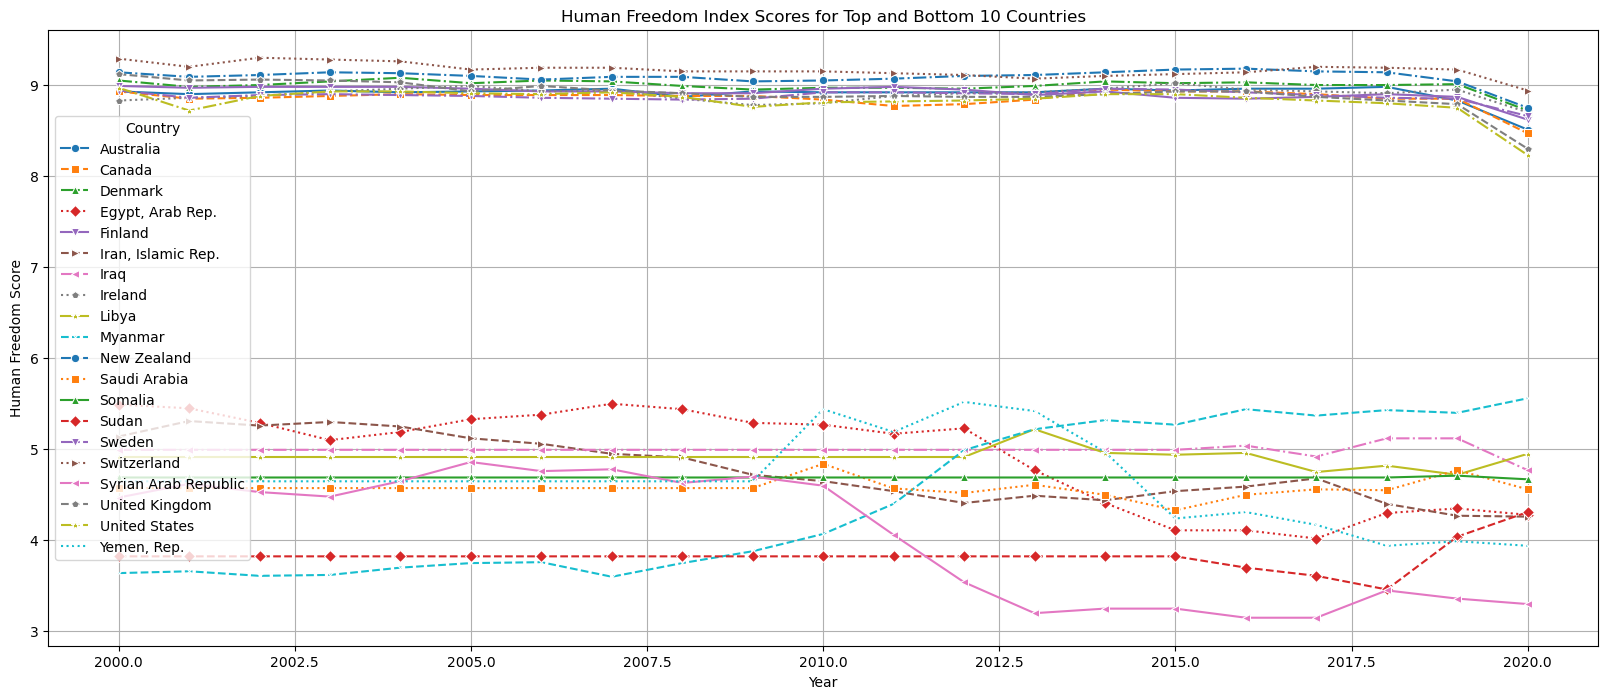

In [21]:
plt.figure(figsize=(20, 8))

line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'x']
for i, country in enumerate(top_bottom_countries_data['countries'].unique()):
    data = top_bottom_countries_data[top_bottom_countries_data['countries'] == country]
    linestyle = line_styles[i % len(line_styles)]
    marker = markers[i % len(markers)]
    sns.lineplot(data=data, x='year', y='hf_score', label=country, linestyle=linestyle, marker=marker)

plt.title('Human Freedom Index Scores for Top and Bottom 10 Countries')
plt.xlabel('Year')
plt.ylabel('Human Freedom Score')
plt.legend(title='Country')
plt.grid(True)
plt.show()

From the above, we can see how the hf_score for the top 10 countries relatively maintain a high hf_score of around 9. However, when we look at the hf_score for the bottom 10 countries, they are inconsistent and under 6.

Let's visualize the hf_score for the top and bottom 10 countries.

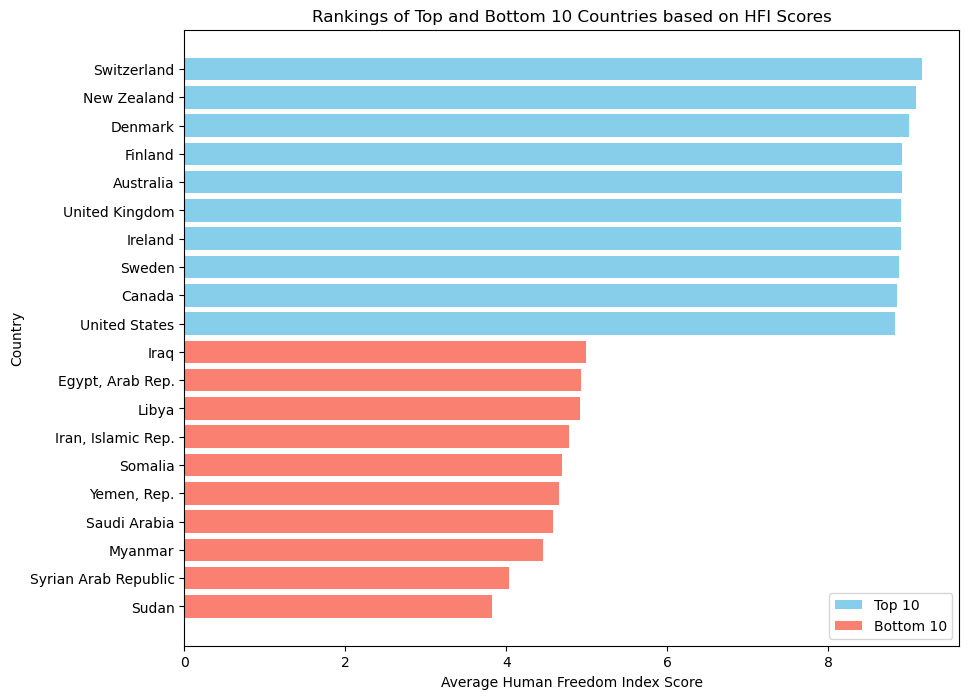

In [22]:
plt.figure(figsize=(10, 8))
plt.barh(top_10_countries.index, top_10_countries.values, color='skyblue', label='Top 10')
plt.barh(bottom_10_countries.index, bottom_10_countries.values, color='salmon', label='Bottom 10')

plt.xlabel('Average Human Freedom Index Score')
plt.ylabel('Country')
plt.title('Rankings of Top and Bottom 10 Countries based on HFI Scores')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

Next, we can apply machine learning, specifically linear regression to determine the importance/ significance of each variable for the top and bottom 10 countries respectively. We do this so that we can determine which variables affect their hf_scores the most.

In [23]:
from sklearn.linear_model import LinearRegression
columns_to_exclude = ['year', 'region', 'countries', 'ef_score', 'ef_rank', 'pf_score', 'pf_rank', 'hf_rank', 'hf_quartile']

In [24]:
top_10_countries_data = top_bottom_countries_data[top_bottom_countries_data['countries'].isin(top_10_countries.index)]
X_top_10 = top_10_countries_data.drop(columns=columns_to_exclude + ['hf_score'])
y_top_10 = top_10_countries_data['hf_score']

In [25]:
model_top_10 = LinearRegression()
model_top_10.fit(X_top_10, y_top_10)

LinearRegression()

In [26]:
feature_importances_top_10 = model_top_10.coef_
absolute_importances_top_10 = np.abs(feature_importances_top_10)
sorted_indices_top_10 = np.argsort(absolute_importances_top_10)[::-1]
sorted_features_top_10 = X_top_10.columns[sorted_indices_top_10]
sorted_importances_top_10 = absolute_importances_top_10[sorted_indices_top_10]

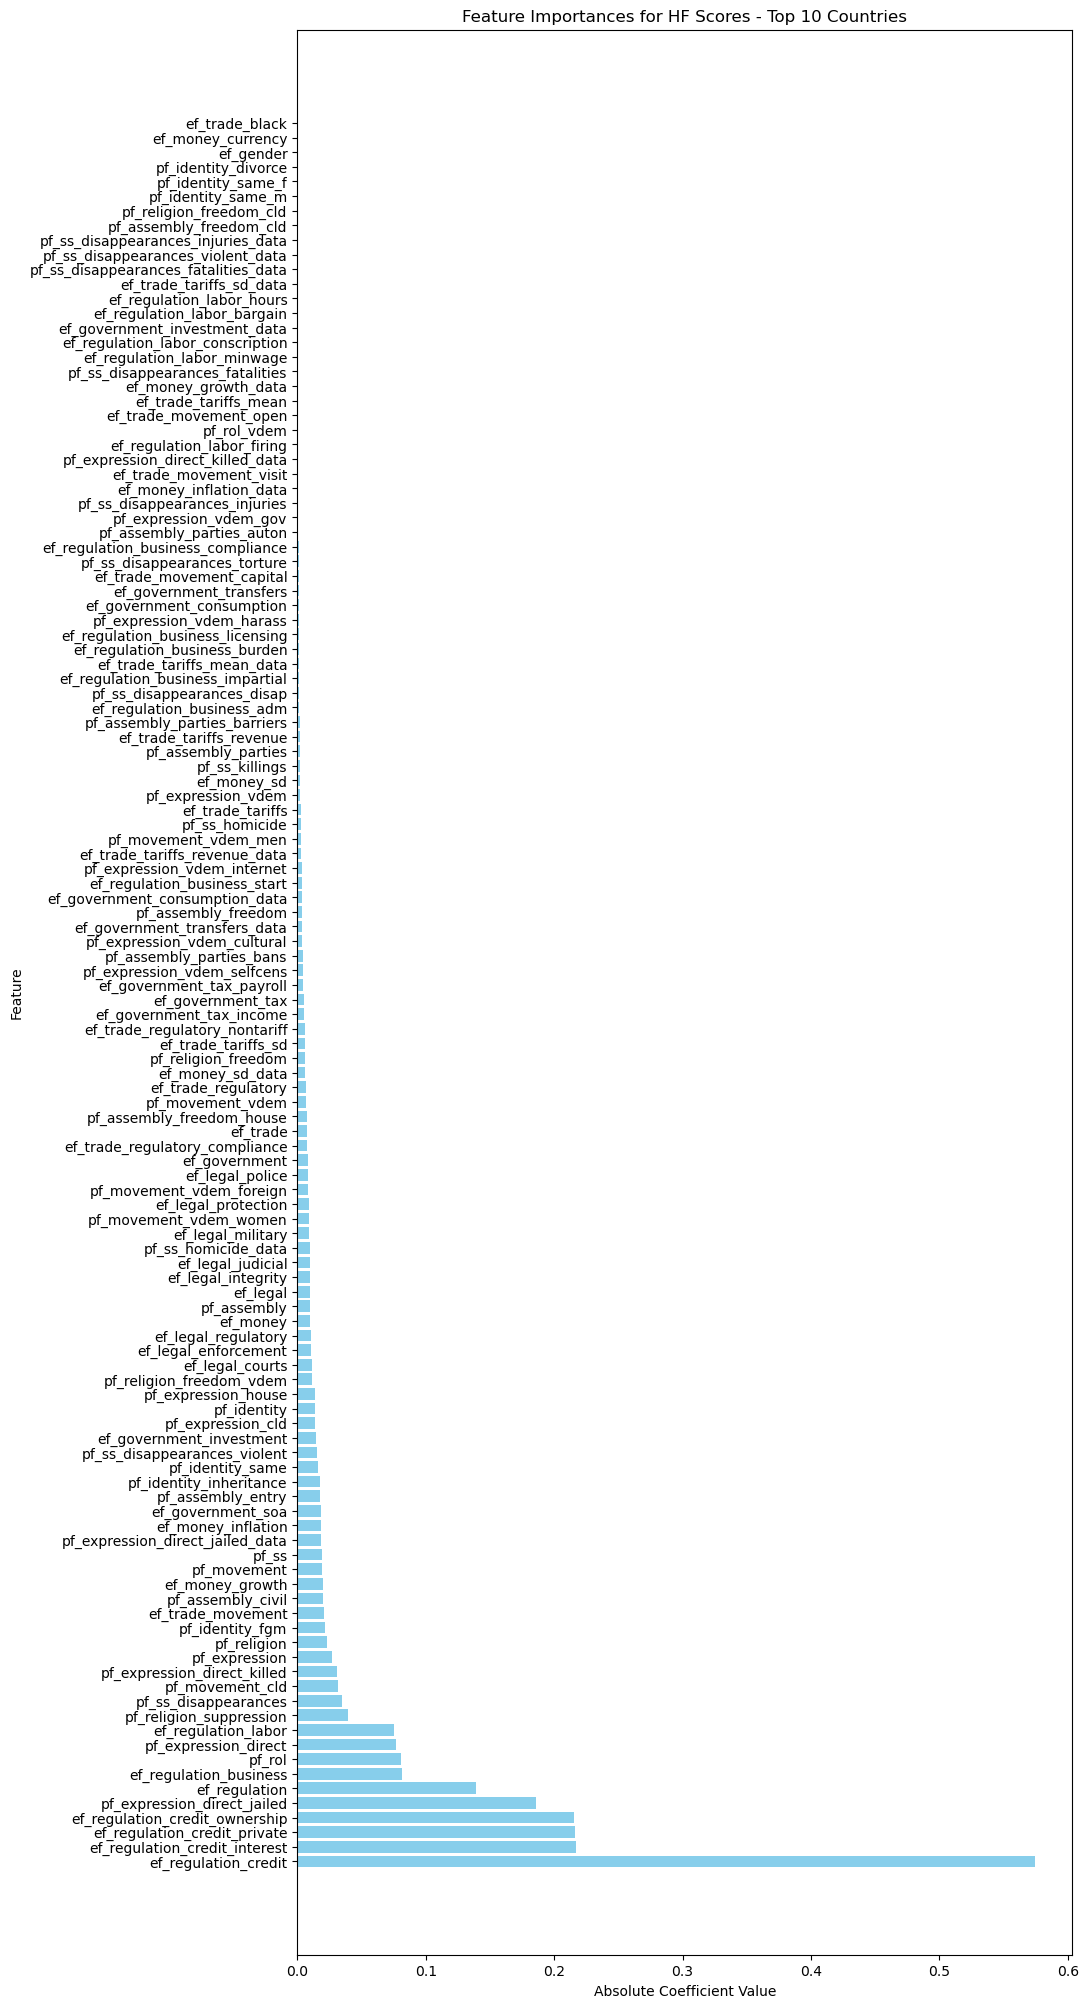

In [27]:
plt.figure(figsize=(10, 25))
plt.barh(sorted_features_top_10, sorted_importances_top_10, color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importances for HF Scores - Top 10 Countries')
plt.show()

In [28]:
bottom_10_countries_data = top_bottom_countries_data[top_bottom_countries_data['countries'].isin(bottom_10_countries.index)]
X_bottom_10 = bottom_10_countries_data.drop(columns=columns_to_exclude + ['hf_score'])
y_bottom_10 = bottom_10_countries_data['hf_score']

In [29]:
model_bottom_10 = LinearRegression()
model_bottom_10.fit(X_bottom_10, y_bottom_10)

LinearRegression()

In [30]:
feature_importances_bottom_10 = model_bottom_10.coef_
absolute_importances_bottom_10 = np.abs(feature_importances_bottom_10)
sorted_indices_bottom_10 = np.argsort(absolute_importances_bottom_10)[::-1]
sorted_features_bottom_10 = X_bottom_10.columns[sorted_indices_bottom_10]
sorted_importances_bottom_10 = absolute_importances_bottom_10[sorted_indices_bottom_10]

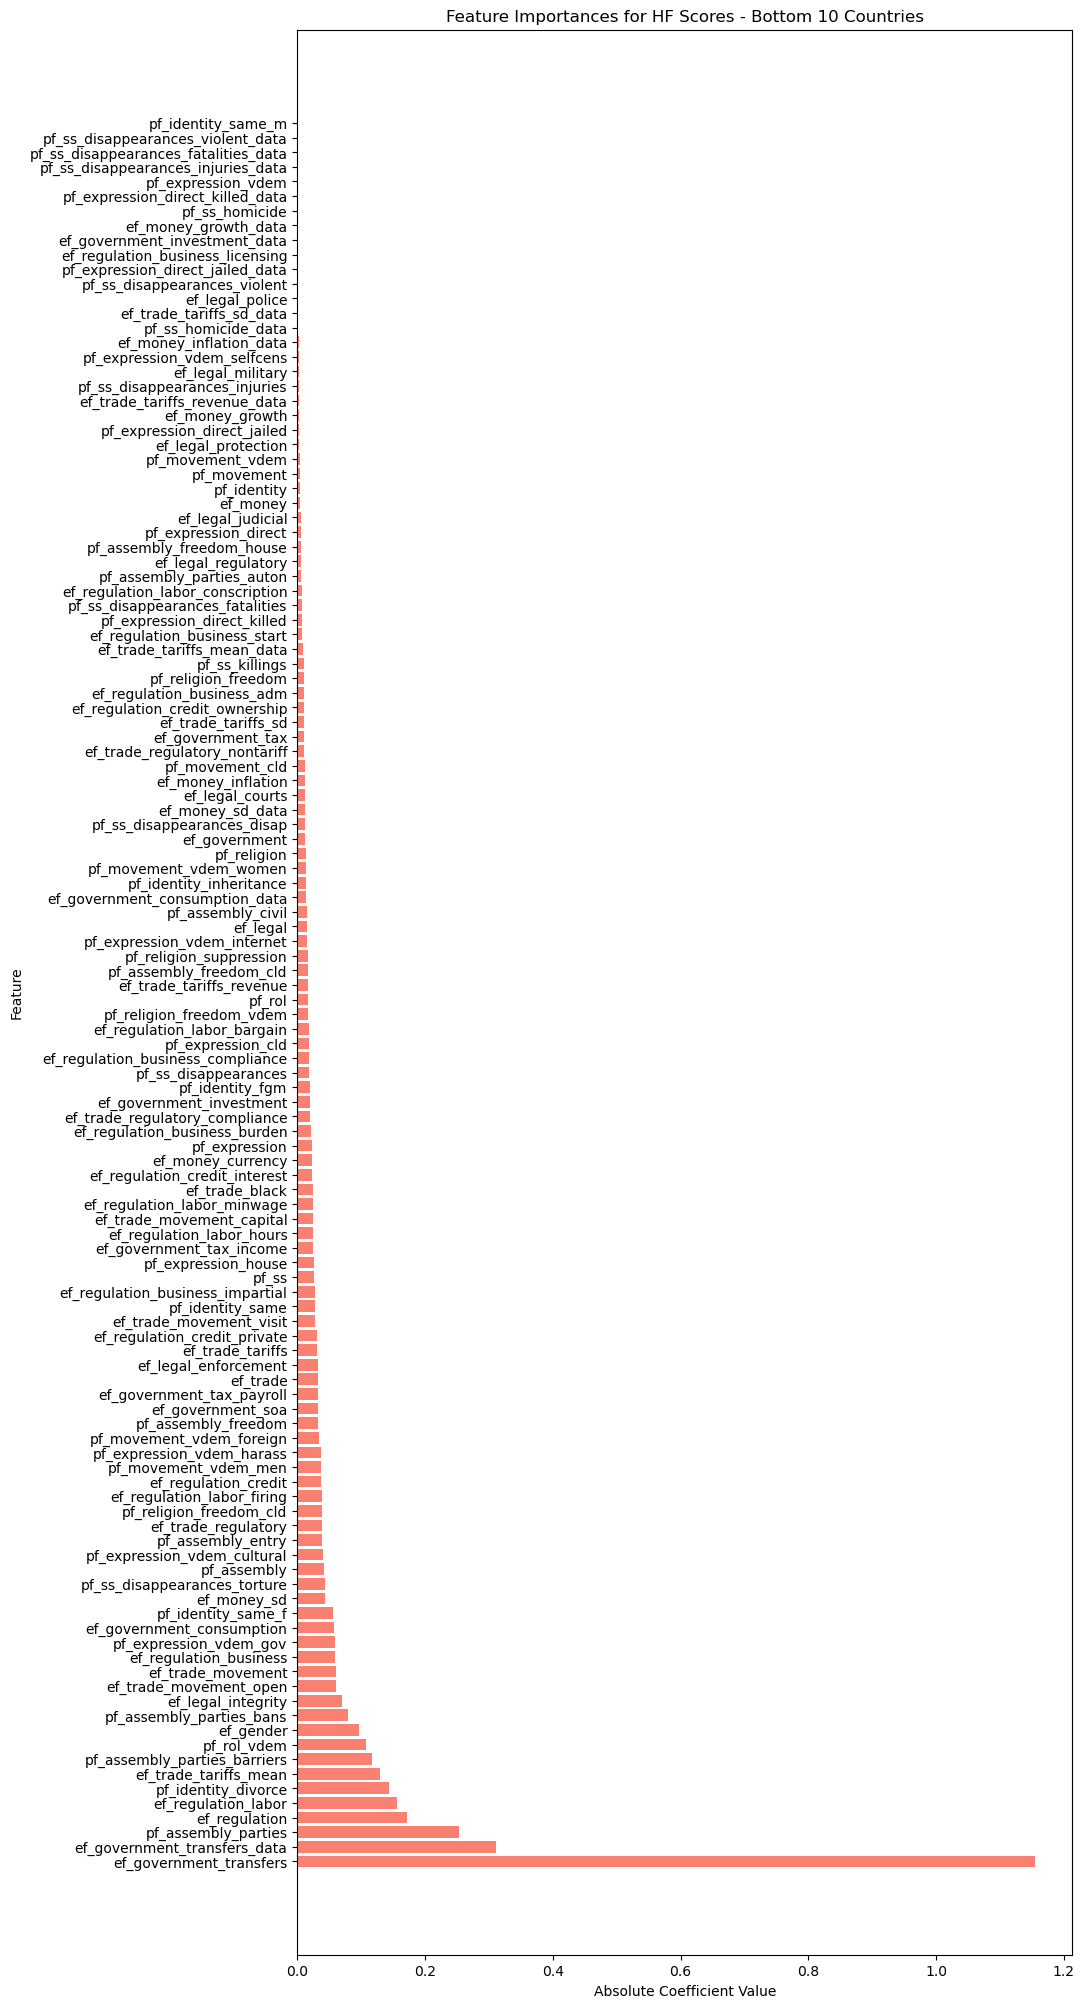

In [31]:
plt.figure(figsize=(10, 25))
plt.barh(sorted_features_bottom_10, sorted_importances_bottom_10, color='salmon')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importances for HF Scores - Bottom 10 Countries')
plt.show()

Let's narrow it down to the top 5 most significant variables using the graphs above.

In [32]:
top_5_top_countries = sorted_features_top_10[:5]
importance_top_countries = sorted_importances_top_10[:5]
top_5_bottom_countries = sorted_features_bottom_10[:5]
importance_bottom_countries = sorted_importances_bottom_10[:5]

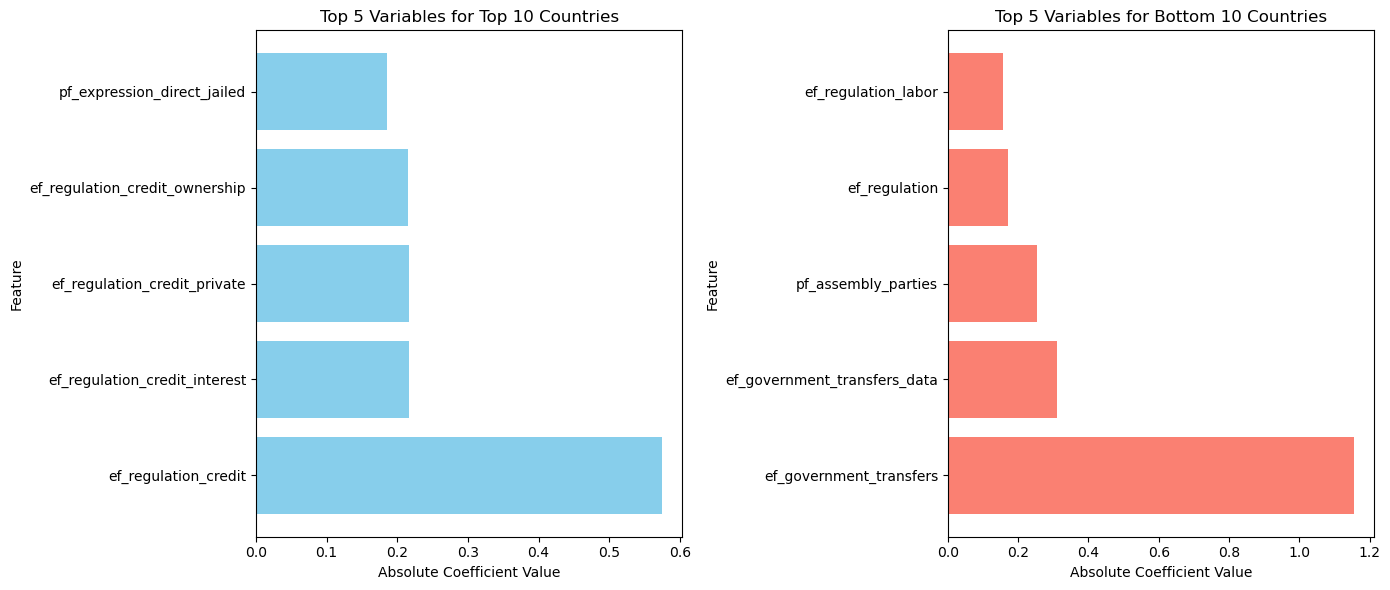

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].barh(top_5_top_countries, importance_top_countries, color='skyblue')
axes[0].set_xlabel('Absolute Coefficient Value')
axes[0].set_ylabel('Feature')
axes[0].set_title('Top 5 Variables for Top 10 Countries')

axes[1].barh(top_5_bottom_countries, importance_bottom_countries, color='salmon')
axes[1].set_xlabel('Absolute Coefficient Value')
axes[1].set_ylabel('Feature')
axes[1].set_title('Top 5 Variables for Bottom 10 Countries')

plt.tight_layout()
plt.show()

In [34]:
print("Top 5 Most Significant Variables for Top 10 Countries:")
for i, feature in enumerate(sorted_features_top_10[:5]):
    print(f"{i+1}. {feature}")

print("\nTop 5 Most Significant Variables for Bottom 10 Countries:")
for i, feature in enumerate(sorted_features_bottom_10[:5]):
    print(f"{i+1}. {feature}")

Top 5 Most Significant Variables for Top 10 Countries:
1. ef_regulation_credit
2. ef_regulation_credit_interest
3. ef_regulation_credit_private
4. ef_regulation_credit_ownership
5. pf_expression_direct_jailed

Top 5 Most Significant Variables for Bottom 10 Countries:
1. ef_government_transfers
2. ef_government_transfers_data
3. pf_assembly_parties
4. ef_regulation
5. ef_regulation_labor


Top 5 Most Significant Variables for Top 10 Countries:

ef_regulation_credit: This variable represents the level of regulation on credit markets in the top 10 countries. A higher value suggests less regulation, which may indicate greater ease of access to credit for individuals and businesses. Less restrictive credit regulations can facilitate economic growth, entrepreneurship, and investment, which are essential factors contributing to human freedom.

ef_regulation_credit_interest: This variable refers to the regulation of interest rates in credit markets. Lower regulation on interest rates allows market forces to determine rates, fostering competition and potentially leading to more favorable borrowing conditions for consumers and businesses. It can stimulate economic activity and promote financial inclusion, contributing to higher levels of human freedom.

ef_regulation_credit_private: This variable relates to regulations governing private credit provision. Less stringent regulations on private credit may encourage a vibrant credit market with diverse lending options, enabling individuals and businesses to access financing more easily. A conducive environment for private credit can foster economic growth and empower individuals to pursue their aspirations, enhancing human freedom.

ef_regulation_credit_ownership: This variable reflects regulations concerning the ownership structure of credit institutions. Policies that promote diverse ownership models and competition in the credit sector can lead to more efficient allocation of capital and better services for consumers. A competitive credit market with varied ownership structures can support economic dynamism and resilience, thereby positively influencing human freedom.

pf_expression_direct_jailed: This variable pertains to the freedom of individuals from being directly jailed for expression-related offenses. A higher score indicates greater protection of freedom of expression, which is a fundamental aspect of human freedom. Robust legal protections for freedom of expression foster open discourse, political participation, and the exchange of ideas, contributing to a more vibrant and inclusive society.

Top 5 Most Significant Variables for Bottom 10 Countries: ef_government_transfers: This variable represents government transfers as a percentage of GDP in the bottom 10 countries. High levels of government transfers may indicate extensive welfare programs or social safety nets aimed at addressing poverty and inequality. However, heavy reliance on transfers could signal economic inefficiencies or insufficient investment in productive sectors, potentially hindering long-term economic growth and human freedom.

ef_government_transfers_data: This variable likely reflects the availability and reliability of data on government transfers. Adequate data on government spending is crucial for transparency, accountability, and effective policymaking. Weaknesses in data collection and reporting may undermine governance effectiveness and limit the ability to address socio-economic challenges, impacting human freedom.

pf_assembly_parties: This variable relates to restrictions on political party formation and operation. Stringent regulations on political parties can impede political pluralism, democratic participation, and representation. Limited political competition and inclusivity may lead to governance deficits and marginalized voices, constraining human freedom and democratic development.

ef_regulation: This variable encompasses the overall regulatory environment in the bottom 10 countries. A high score indicates a burdensome regulatory framework that may stifle entrepreneurship, investment, and economic growth. Excessive regulations can create barriers to entry, hamper innovation, and exacerbate inequalities, limiting opportunities and human freedom.

ef_regulation_labor: This variable represents labor market regulations, including aspects such as minimum wage laws, hiring and firing regulations, and collective bargaining rights. Overly restrictive labor regulations can hinder job creation, labor mobility, and productivity growth. Flexible labor market policies that balance worker protections with market efficiency are essential for fostering inclusive economic growth and enhancing human freedom.

Using the top 5 variables, we can see how the government plays a significant role in the people's hf_scores. We can use a machine learning model known as Gradient Boosting Machine (GBM) to predict future values of hf_scores until 2040. the same modeling framework.

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [48]:
years_until_2040 = np.arange(2021, 2041)

First, we initialize Gradient Boosting models with monitoring training performance.

In [58]:
gbm_top = GradientBoostingRegressor(n_estimators=100, validation_fraction=0.2, n_iter_no_change=5, random_state=42)
gbm_bottom = GradientBoostingRegressor(n_estimators=100, validation_fraction=0.2, n_iter_no_change=5, random_state=42)

Then, we shall split the data for top and bottom countries into train and test splits.

In [59]:
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_10, y_top_10, test_size=0.2, random_state=42)
X_train_bottom, X_test_bottom, y_train_bottom, y_test_bottom = train_test_split(X_bottom_10, y_bottom_10, test_size=0.2, random_state=42)

In [60]:
gbm_top.fit(X_train_top, y_train_top)
gbm_bottom.fit(X_train_bottom, y_train_bottom)

GradientBoostingRegressor(n_iter_no_change=5, random_state=42,
                          validation_fraction=0.2)

After training the model, we get the training errors for top and bottom countries.

In [62]:
train_errors_top = np.zeros((gbm_top.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbm_top.staged_predict(X_train_top)):
    train_errors_top[i] = gbm_top.loss_(y_train_top, y_pred)

train_errors_bottom = np.zeros((gbm_bottom.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbm_bottom.staged_predict(X_train_bottom)):
    train_errors_bottom[i] = gbm_bottom.loss_(y_train_bottom, y_pred)

C:\Users\syedr\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\syedr\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


Getting validation errors for top and bottom countries.

In [64]:
validation_errors_top = np.zeros((gbm_top.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbm_top.staged_predict(X_test_top)):
    validation_errors_top[i] = gbm_top.loss_(y_test_top, y_pred)

validation_errors_bottom = np.zeros((gbm_bottom.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbm_bottom.staged_predict(X_test_bottom)):
    validation_errors_bottom[i] = gbm_bottom.loss_(y_test_bottom, y_pred)

C:\Users\syedr\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
C:\Users\syedr\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


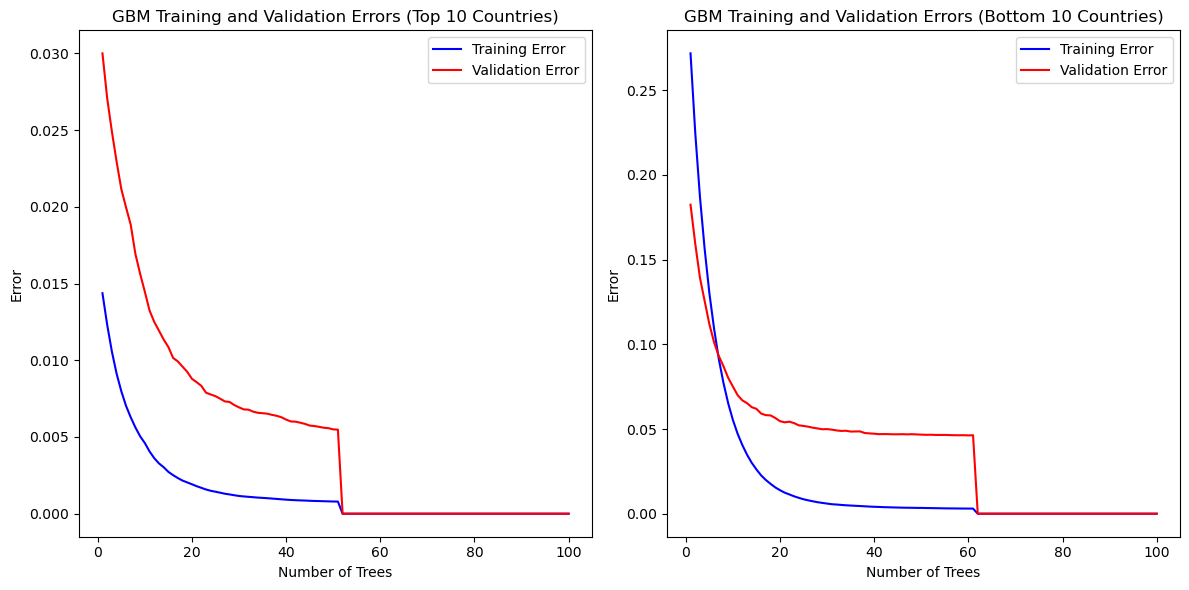

In [65]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.arange(gbm_top.n_estimators) + 1, train_errors_top, label='Training Error', color='blue')
plt.plot(np.arange(gbm_top.n_estimators) + 1, validation_errors_top, label='Validation Error', color='red')
plt.title('GBM Training and Validation Errors (Top 10 Countries)')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(gbm_bottom.n_estimators) + 1, train_errors_bottom, label='Training Error', color='blue')
plt.plot(np.arange(gbm_bottom.n_estimators) + 1, validation_errors_bottom, label='Validation Error', color='red')
plt.title('GBM Training and Validation Errors (Bottom 10 Countries)')
plt.xlabel('Number of Trees')
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.show()

In [66]:
gbm_top = GradientBoostingRegressor(n_estimators=70, random_state=42)
gbm_bottom = GradientBoostingRegressor(n_estimators=70, random_state=42)

gbm_top.fit(X_top_10, y_top_10)
gbm_bottom.fit(X_bottom_10, y_bottom_10)

GradientBoostingRegressor(n_estimators=70, random_state=42)

In [67]:
predicted_scores_top = gbm_top.predict(X_top_10)
predicted_scores_bottom = gbm_bottom.predict(X_bottom_10)

predicted_scores_top = np.clip(predicted_scores_top, 0, 10)
predicted_scores_bottom = np.clip(predicted_scores_bottom, 0, 10)

In [68]:
print("Predicted HF Scores until 2040 for Top 10 Countries:")
for year, score in zip(years_until_2040.flatten(), predicted_scores_top):
    print(f"Year {year}: Predicted HF Score = {score}")

print("\nPredicted HF Scores until 2040 for Bottom 10 Countries:")
for year, score in zip(years_until_2040.flatten(), predicted_scores_bottom):
    print(f"Year {year}: Predicted HF Score = {score}")

Predicted HF Scores until 2040 for Top 10 Countries:
Year 2021: Predicted HF Score = 8.5115278908145
Year 2022: Predicted HF Score = 8.470515960739213
Year 2023: Predicted HF Score = 8.734598990653959
Year 2024: Predicted HF Score = 8.628302251561117
Year 2025: Predicted HF Score = 8.705728981947612
Year 2026: Predicted HF Score = 8.747530992673047
Year 2027: Predicted HF Score = 8.661359413722465
Year 2028: Predicted HF Score = 8.95086677390937
Year 2029: Predicted HF Score = 8.297880059213849
Year 2030: Predicted HF Score = 8.231629845458594
Year 2031: Predicted HF Score = 8.842008442162394
Year 2032: Predicted HF Score = 8.862274074746788
Year 2033: Predicted HF Score = 9.011277152766427
Year 2034: Predicted HF Score = 8.87353130321527
Year 2035: Predicted HF Score = 8.942282259332346
Year 2036: Predicted HF Score = 9.050123161478313
Year 2037: Predicted HF Score = 8.853408608767952
Year 2038: Predicted HF Score = 9.168760027717378
Year 2039: Predicted HF Score = 8.803191049634117
Y

Gradient Boosting Machine (GBM) is a powerful and widely used machine learning technique for both regression and classification tasks. It builds an ensemble of weak learners (typically decision trees) in a sequential manner, where each subsequent model corrects the errors made by the previous one.

Pros:

- High Predictive Accuracy: GBM often provides higher predictive accuracy compared to many other machine learning algorithms. It's capable of capturing complex relationships in the data due to its ensemble nature.

- Handles Different Types of Data: GBM can handle a variety of data types including numerical, categorical, and even text data with proper encoding techniques. This flexibility makes it suitable for a wide range of applications.

- Feature Importance: GBM provides a feature importance score, which indicates the contribution of each feature in the model. This can help you understand which factors are driving the predictions, providing valuable insights into the relationship between government effectiveness and human freedom.

- Robust to Overfitting: With proper hyperparameter tuning and regularization techniques, GBM can be relatively robust to overfitting. Techniques like cross-validation and early stopping can help prevent overfitting during model training.

- Handles Missing Data: GBM can handle missing values in the dataset without requiring imputation. It automatically handles missing values by splitting nodes based on the available data, making it convenient for real-world datasets where missing values are common.

- Flexibility: GBM can be used for both regression and classification tasks, making it a versatile tool for various prediction problems.

Cons:

- Computationally Intensive: Training a GBM can be computationally intensive, especially when dealing with large datasets or complex models with many trees and deep trees. This can result in longer training times compared to simpler algorithms.

- Sensitive to Hyperparameters: GBM performance is highly dependent on hyperparameters such as learning rate, number of trees, tree depth, and regularization parameters. Finding the optimal set of hyperparameters often requires extensive experimentation and tuning.

- Potential for Overfitting: While GBM can be robust to overfitting with proper regularization, it's still susceptible to overfitting, especially if the model complexity is not controlled properly or if the dataset is noisy.

- Black Box Model: Like other ensemble methods, GBM is considered a black-box model, meaning it's challenging to interpret the underlying decision-making process compared to simpler models like linear regression.

Why Use GBM for our Project:

- High Predictive Accuracy: Given the complexity of the relationship between government effectiveness and human freedom, we need a model capable of capturing nonlinear and intricate patterns in the data. GBM's ability to build complex models makes it well-suited for this task.

- Feature Importance Analysis: Understanding which factors contribute most to human freedom is crucial for our project. GBM's feature importance analysis can help identify the most influential factors, providing valuable insights for policymakers and researchers.

- Handles Missing Data: Since real-world datasets often contain missing values, GBM's ability to handle missing data without preprocessing simplifies the data preparation process, allowing us to focus more on analyzing the relationship between government effectiveness and human freedom.

- Flexibility: Whether it's regression or classification analysis, GBM can accommodate both types of tasks. This flexibility allows us to explore different aspects of the relationship between government effectiveness and human freedom using the same modeling framework.

In [69]:
import numpy as np
import matplotlib.pyplot as plt

years_until_2040 = np.arange(2021, 2041)

In [70]:
predicted_scores_top = [
    8.514456096539858, 8.469830016562383, 8.748368683646463, 8.63596646236742, 8.71873750959546,
    8.714151235600012, 8.65818827618185, 8.875099883499955, 8.283196419100872, 8.253272346847922,
    8.828076981808652, 8.944262162651446, 8.944262162651446, 8.865028459460436, 8.973858553278816,
    9.050237902585641, 8.877209843137088, 9.147136783568072, 8.796218356072412, 8.778305878691297
]

predicted_scores_bottom = [
    4.38509186473419, 4.311344589527739, 4.831319549555982, 4.8069497772657455, 5.468875221800306,
    4.589373718812123, 4.680255912802581, 4.219650440190597, 3.439631390648061, 3.9241255064628366,
    4.388167562761702, 4.3659211427698335, 5.034686186731233, 4.784781103441837, 5.452632617100946,
    4.704053567669965, 4.7408284276509045, 3.991546364384637, 3.3540387562374065, 3.960340800996017
]

In [71]:
top_avg_scores = top_bottom_countries_data[top_bottom_countries_data['countries'].isin(top_10_countries.index)].groupby('year')['hf_score'].mean()
bottom_avg_scores = top_bottom_countries_data[top_bottom_countries_data['countries'].isin(bottom_10_countries.index)].groupby('year')['hf_score'].mean()

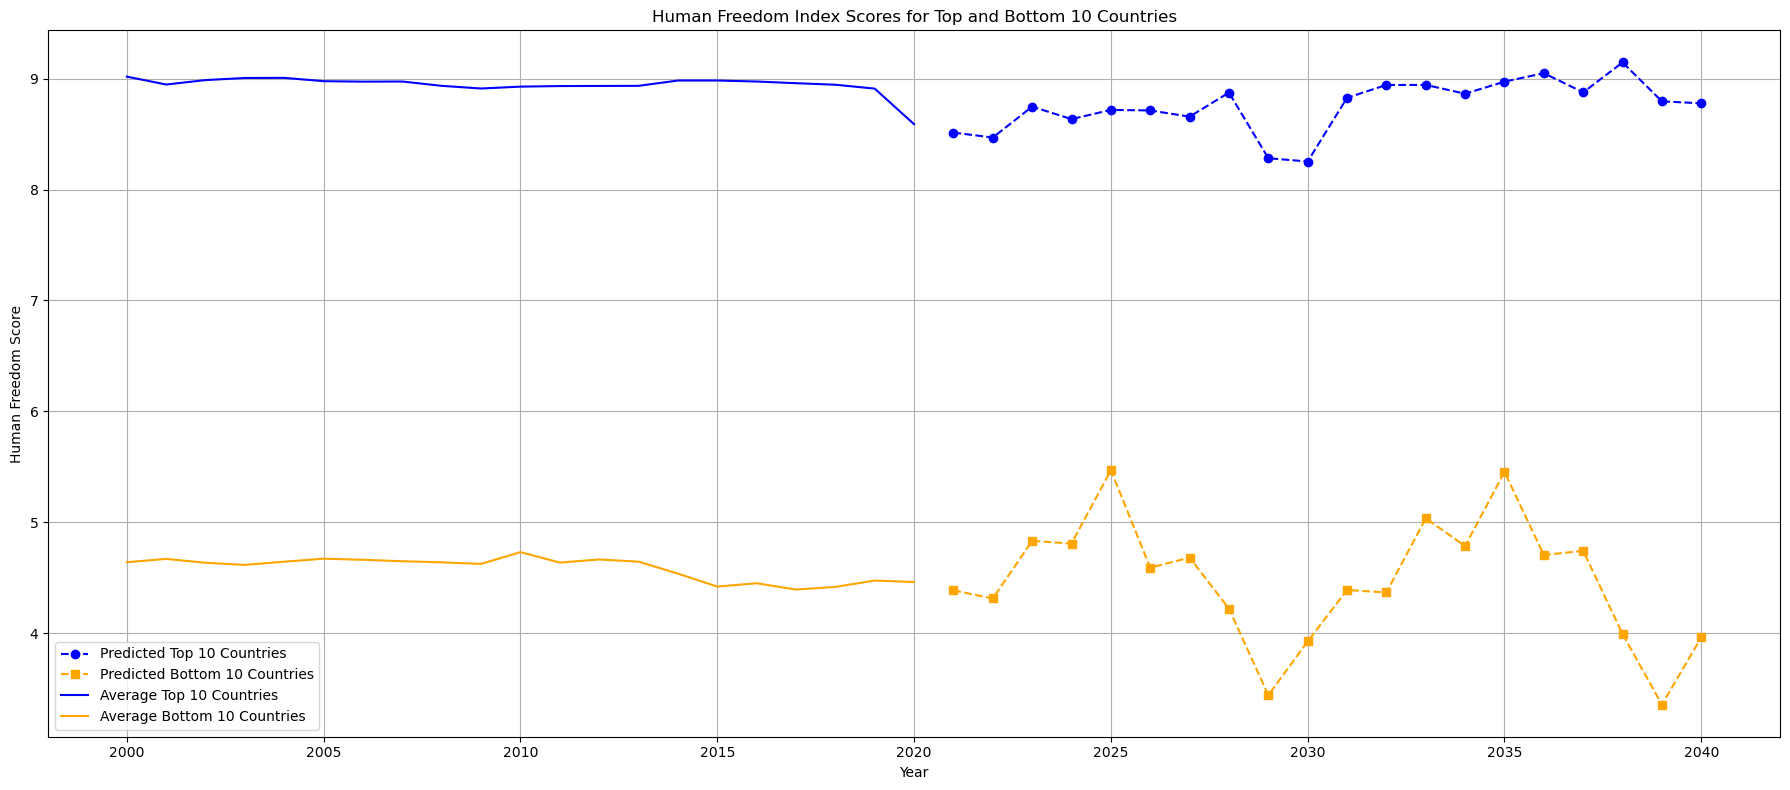

In [72]:
plt.figure(figsize=(18, 8))

plt.plot(years_until_2040, predicted_scores_top, marker='o', label='Predicted Top 10 Countries', linestyle='--', color='blue')
plt.plot(years_until_2040, predicted_scores_bottom, marker='s', label='Predicted Bottom 10 Countries', linestyle='--', color='orange')

plt.plot(top_avg_scores.index, top_avg_scores.values, label='Average Top 10 Countries', linestyle='-', color='blue')
plt.plot(bottom_avg_scores.index, bottom_avg_scores.values, label='Average Bottom 10 Countries', linestyle='-', color='orange')

plt.title('Human Freedom Index Scores for Top and Bottom 10 Countries')
plt.xlabel('Year')
plt.ylabel('Human Freedom Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Based on our forecasted model using the top 5 most significant variables affecting the human freedom score, we can see how siginificantly these variables affect the hf_scores over the years. The reason we have chosen to perform our forecast using only these variables is to demonstrate their significance. It is clear that the effectiveness the government and their policies affect their citizen's hf_scores greatly.

Countries at the bottom can learn from the those at the top. These variables underscores the critical role of governance, economic policies, and legal frameworks in shaping human freedom. In the top 10 countries, policies that prioritize economic freedom, regulatory efficiency, and civil liberties contribute to robust socio-economic outcomes and high levels of human freedom. Conversely, the bottom 10 countries face challenges related to governance effectiveness, regulatory burdens, and political rights, which may impede progress toward greater human freedom.

To improve future levels of human freedom, policymakers can focus on several strategies:

Promoting Economic Freedom: Enhancing economic freedom by reducing regulatory barriers, fostering competition, and safeguarding property rights can stimulate innovation, entrepreneurship, and prosperity, thereby expanding opportunities and human freedom.

Strengthening Democratic Institutions: Investing in transparent and accountable governance structures, electoral processes, and rule of law mechanisms can bolster political freedoms, civic engagement, and democratic resilience, fostering inclusive and participatory societies.

Advancing Social Justice: Implementing equitable policies that address poverty, inequality, and social exclusion can enhance human dignity, social cohesion, and equal access to opportunities, promoting a more just and inclusive society.

Protecting Civil Liberties: Safeguarding fundamental rights such as freedom of expression, assembly, and association is crucial for nurturing democratic culture, pluralism, and individual autonomy, safeguarding human freedom against encroachments by authoritarian regimes or societal prejudices.

By prioritizing these strategies and fostering synergies between governance, economic development, and human rights agendas, countries can chart a path toward a more prosperous, equitable, and free future for all individuals.